In [52]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import bokeh
import seaborn as sns
import time, datetime
from datetime import datetime
from time import strftime
from time import gmtime

In [53]:
#Init Repo Data
Repo_data = "C:/Users/Consultant/Desktop/Decoded Data/AV/data"
listfile_data = os.listdir(Repo_data)

In [54]:
#Combine les fichier csv de Data en DataFrame - combined_data
os.chdir(Repo_data)
combined_data = pd.concat([pd.read_csv(f) for f in listfile_data ], ignore_index=True)

In [55]:
#Init Repo Metadata
Repo_meta = "C:/Users/Consultant/Desktop/Decoded Data/AV/metadata/"
listfile_meta = os.listdir(Repo_meta)

In [56]:
os.chdir(Repo_meta)
combined_meta = pd.concat([pd.read_csv(f) for f in listfile_meta ], ignore_index=True)

In [127]:
if(combined_meta.iloc[0][0] == combined_data.iloc[0][53]):
        data = pd.merge(combined_data, combined_meta, how='inner', on=['ID'])

In [151]:
#Keep Only the First 20000 rows and Data with Sleepmode = 0
t = data[data["Sleepmode"] != 1]
t = t[['Transition','Courant moteur de la porte','Tension moteur de la porte','Position moteur de la porte','Courant moteur de la marche mobile', 'Tension moteur de la marche mobile', 'Position moteur de la marche mobile', 'ID','TimeStamp']]
t

,Transition,Courant moteur de la porte,Tension moteur de la porte,Position moteur de la porte,Courant moteur de la marche mobile,Tension moteur de la marche mobile,Position moteur de la marche mobile,ID,TimeStamp
65,3,1,0,0,0,0,0,z5700015________zr_57_83015_____dcu4__________...,361.20
71,3,23,565,225,0,0,0,z5700015________zr_57_83015_____dcu4__________...,362.95
72,5,6,563,227,0,0,0,z5700015________zr_57_83015_____dcu4__________...,363.00
73,5,14,514,230,0,0,0,z5700015________zr_57_83015_____dcu4__________...,363.05
74,5,9,450,231,0,0,0,z5700015________zr_57_83015_____dcu4__________...,363.10
75,5,273,572,233,0,0,0,z5700015________zr_57_83015_____dcu4__________...,363.15
76,5,34,671,236,0,0,0,z5700015________zr_57_83015_____dcu4__________...,363.20
77,5,2218,1467,238,0,0,0,z5700015________zr_57_83015_____dcu4__________...,363.25
78,5,94,788,241,0,0,0,z5700015________zr_57_83015_____dcu4__________...,363.30
79,5,1662,1907,246,0,0,0,z5700015________zr_57_83015_____dcu4__________...,363.35


In [153]:
i=1
p=0
s=0
d = {}
while i < len(t):
    time_t0 = t.iloc[i-1]['TimeStamp']
    time_t1 = t.iloc[i]['TimeStamp']
    diff = time_t1 - time_t0
    if(diff > 10.0):
        echantillon = 'echantillon' + str(p)
        d[echantillon] = t.iloc[s:i]
        s=i
        i=i+1
        p=p+1
    elif(time_t1 == t.iloc[-1]['TimeStamp']):
        echantillon = 'echantillon' + str(p)
        d[echantillon] = t.iloc[s:i+1]
        i=i+1
    else:
        i=i+1

In [155]:
len_sample = []
for i in range(len(d)):
    f = "echantillon" + str(i)
    len_sample.append(len(d[f]))

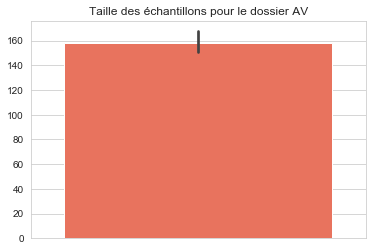

In [164]:
#Distplot
p = sns.barplot(y=len_sample, color='tomato') 
plt.title("Taille des échantillons pour le dossier AV")
plt.show(p)

In [46]:
i=1
p=0
s=0
d = {}
while i < len(t):
    time_t0 = datetime.strptime(t.iloc[i-1]['TimeStamp'],"%H:%M:%S")
    time_t1 = datetime.strptime(t.iloc[i]['TimeStamp'],"%H:%M:%S")
    diff = time_t1.minute - time_t0.minute
    if(diff > 1):
        echantillon = 'echantillon' + str(p)
        d[echantillon] = t.iloc[s:i]
        s=i
        i=i+1
        p=p+1
    elif(time_t1 == datetime.strptime(t.iloc[-1]['TimeStamp'],"%H:%M:%S")):
        echantillon = 'echantillon' + str(p)
        d[echantillon] = t.iloc[s:i+1]
        i=i+1
    else:
        i=i+1

TypeError: strptime() argument 1 must be str, not numpy.float64

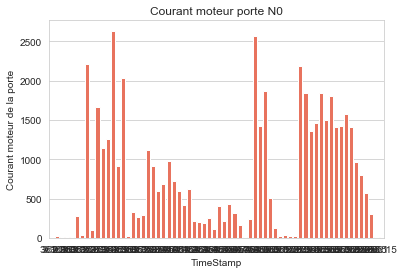

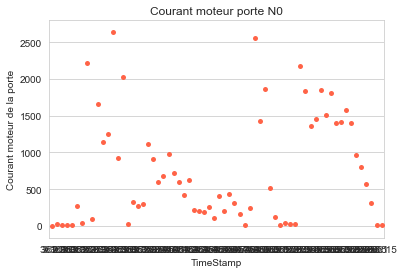

In [125]:
#echantillon0 - barplot
p = sns.barplot(x="TimeStamp", y="Courant moteur de la porte", data=n0, color='tomato') 
plt.title("Courant moteur porte N0")
plt.show(p)
#echantillon0 - scatterplot
sns.set_style("whitegrid")
p = sns.swarmplot(x="TimeStamp", y="Courant moteur de la porte", data=n0, color='tomato') 
plt.title("Courant moteur porte N0")
plt.show(p)

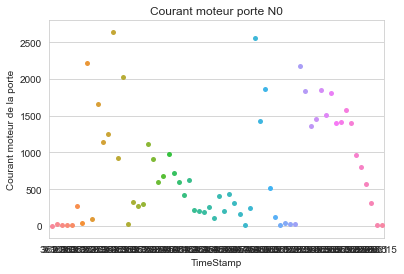

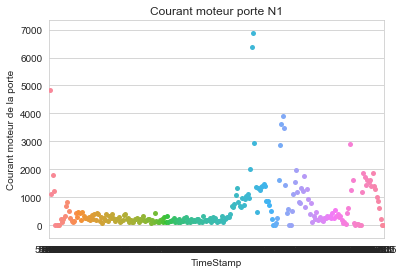

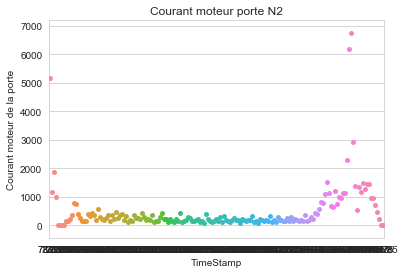

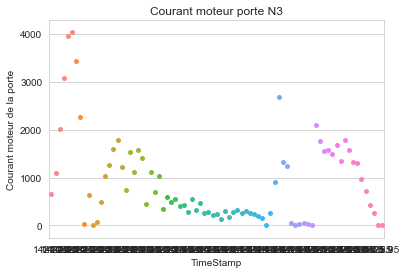

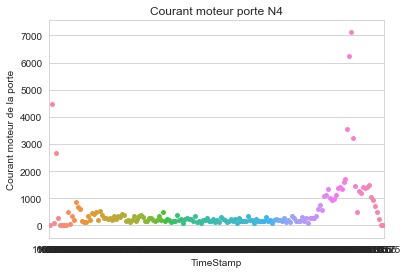

In [126]:
#echantillon0
sns.set_style("whitegrid")
p = sns.swarmplot(x="TimeStamp", y="Courant moteur de la porte", data=n0) 
plt.title("Courant moteur porte N0")
plt.show(p)
#echantillon1
sns.set_style("whitegrid")
p = sns.swarmplot(x="TimeStamp", y="Courant moteur de la porte", data=n1) 
plt.title("Courant moteur porte N1")
plt.show(p)
#echantillon2
sns.set_style("whitegrid")
p = sns.swarmplot(x="TimeStamp", y="Courant moteur de la porte", data=n2) 
plt.title("Courant moteur porte N2")
plt.show(p)
#echantillon3
sns.set_style("whitegrid")
p = sns.swarmplot(x="TimeStamp", y="Courant moteur de la porte", data=n3) 
plt.title("Courant moteur porte N3")
plt.show(p)
#echantillon4
sns.set_style("whitegrid")
p = sns.swarmplot(x="TimeStamp", y="Courant moteur de la porte", data=n4) 
plt.title("Courant moteur porte N4")
plt.show(p)

In [322]:
n2

,Transition,Courant moteur de la porte,Tension moteur de la porte,Position moteur de la porte,Courant moteur de la marche mobile,Tension moteur de la marche mobile,Position moteur de la marche mobile,ID,TimeStamp
394,3,5168,-2100,816,0,0,0,z5700015________zr_57_83015_____dcu4__________...,733.50
395,5,1156,-1680,810,0,0,0,z5700015________zr_57_83015_____dcu4__________...,733.55
396,5,1855,-1478,807,0,0,0,z5700015________zr_57_83015_____dcu4__________...,733.60
397,5,994,-1716,802,0,0,0,z5700015________zr_57_83015_____dcu4__________...,733.65
398,5,13,-1732,796,0,0,0,z5700015________zr_57_83015_____dcu4__________...,733.70
399,5,6,-1810,789,0,0,0,z5700015________zr_57_83015_____dcu4__________...,733.75
400,5,6,-1781,783,0,0,0,z5700015________zr_57_83015_____dcu4__________...,733.80
401,5,13,-1433,777,0,0,0,z5700015________zr_57_83015_____dcu4__________...,733.85
402,5,161,-1325,773,0,0,0,z5700015________zr_57_83015_____dcu4__________...,733.90
403,5,160,-1428,768,0,0,0,z5700015________zr_57_83015_____dcu4__________...,733.95
